### Data loading And Cleaning 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,11/24/2023,CUST001,Male,34,Beauty,3,50,150
1,2,2/27/2023,CUST002,Female,26,Clothing,2,500,1000
2,3,1/13/2023,CUST003,Male,50,Electronics,1,30,30
3,4,5/21/2023,CUST004,Male,37,Clothing,1,500,500
4,5,5/6/2023,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


#### The dataset contain 9 columns and 1000 entries. 

In [5]:
# to check for null values
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

 #### The data has no null values 

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    1000 non-null   int64         
 1   Date              1000 non-null   datetime64[ns]
 2   Customer ID       1000 non-null   object        
 3   Gender            1000 non-null   object        
 4   Age               1000 non-null   int64         
 5   Product Category  1000 non-null   object        
 6   Quantity          1000 non-null   int64         
 7   Price per Unit    1000 non-null   int64         
 8   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 70.4+ KB
None


 #### The date column data type has been change to  datetime to allow easy analysis. 

In [7]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify if duplicates were removed
print(f"Remaining duplicate rows: {df.duplicated().sum()}")


Remaining duplicate rows: 0


#### There are no duplicates in the dataset. 

### DESCRIPTIVE STATISTICS  

In [8]:
# summary statistics 
print(df.describe())

       Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.000000    900.000000  
max 

#### The categorical column (gender and product category) could not have the descriptive statistics because they are not numerical. 

In [9]:
# Calculate mode for numerical columns
mode_values = df[['Quantity', 'Price per Unit', 'Total Amount']].mode().iloc[0]

# Print mode values
print("Mode for numerical columns:")

print(mode_values)



Mode for numerical columns:
Quantity           4
Price per Unit    50
Total Amount      50
Name: 0, dtype: int64


 These are the most frequent enteries that occurs in the numerical column for quantity, price per unit, total amount which are 4, 50 dollars, 50 dollars respectively. The most purchase by each  customer is 4 items, with each price per unit to be $50. 

In [10]:
# Calculate mode for categorical columns
categorical_cols = ['Gender', 'Product Category']
for col in categorical_cols:
    print(f"\nMode for {col}: {df[col].mode()[0]}")
    


Mode for Gender: Female

Mode for Product Category: Clothing


The mode for gender and product categories are female and clothing respectively which indicate that the females are more active than the males and clothing is the category of product most sought for or purchased. 

# TIME SERIES ANALYSIS 

##### AGGREGATE SALES OVER TIME

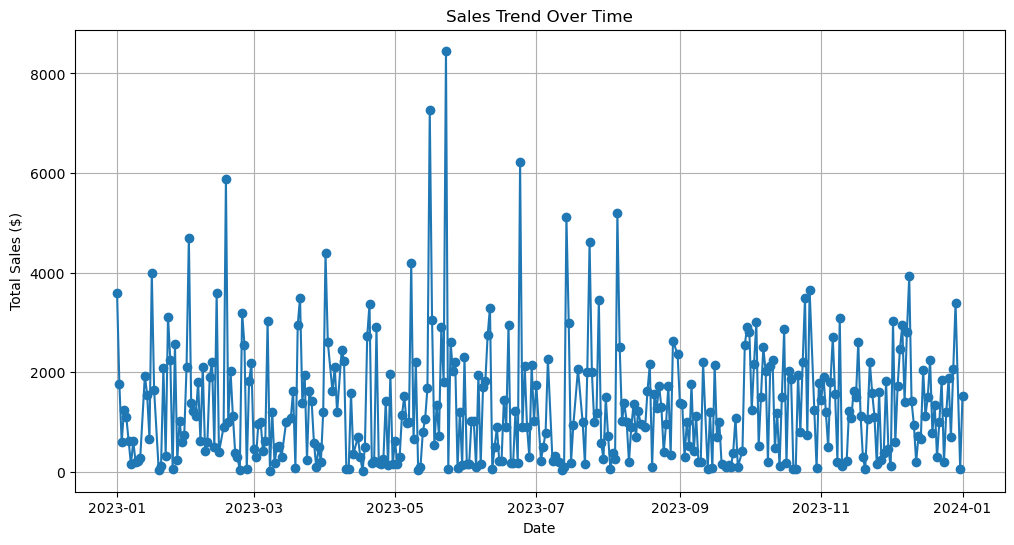

In [11]:
# Aggregate sales over time
df_time_series = df.groupby('Date')['Total Amount'].sum()


# Plot time series trend
plt.figure(figsize=(12, 6))
plt.plot(df_time_series, marker='o', linestyle='-')
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.grid(True)
plt.show()


### Quaterly sales trend

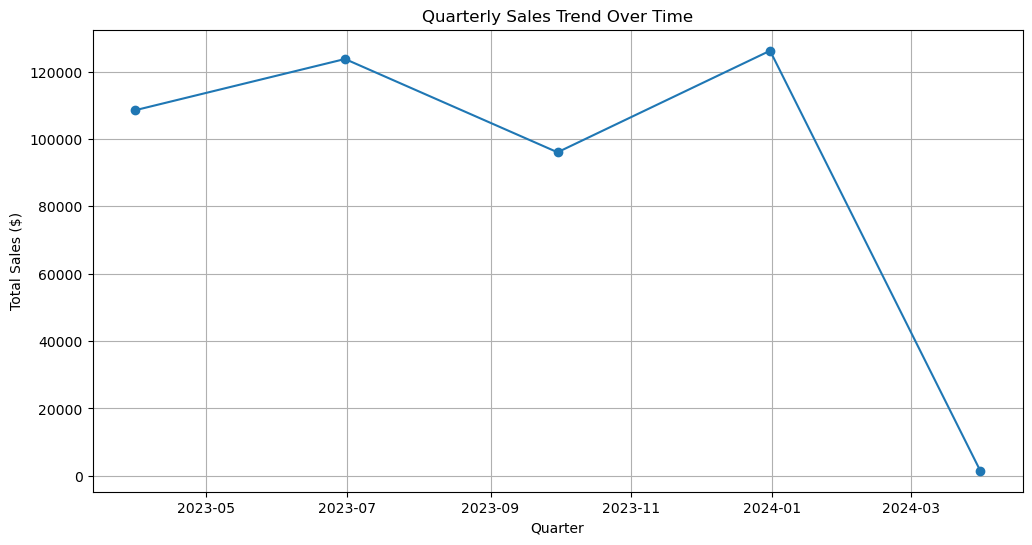

In [12]:
# Aggregate sales over time
df_time_series = df.groupby('Date')['Total Amount'].sum()

#quarterly sales 
quarterly_sales = df.groupby(pd.Grouper(key='Date', freq='Q'))['Total Amount'].sum()

# Plot time series trend
plt.figure(figsize=(12, 6))
plt.plot(quarterly_sales.index, quarterly_sales.values, marker='o', linestyle='-')
plt.title('Quarterly Sales Trend Over Time')
plt.xlabel('Quarter')
plt.ylabel('Total Sales ($)')
plt.grid(True)


##### MONTHLY SALES TREND

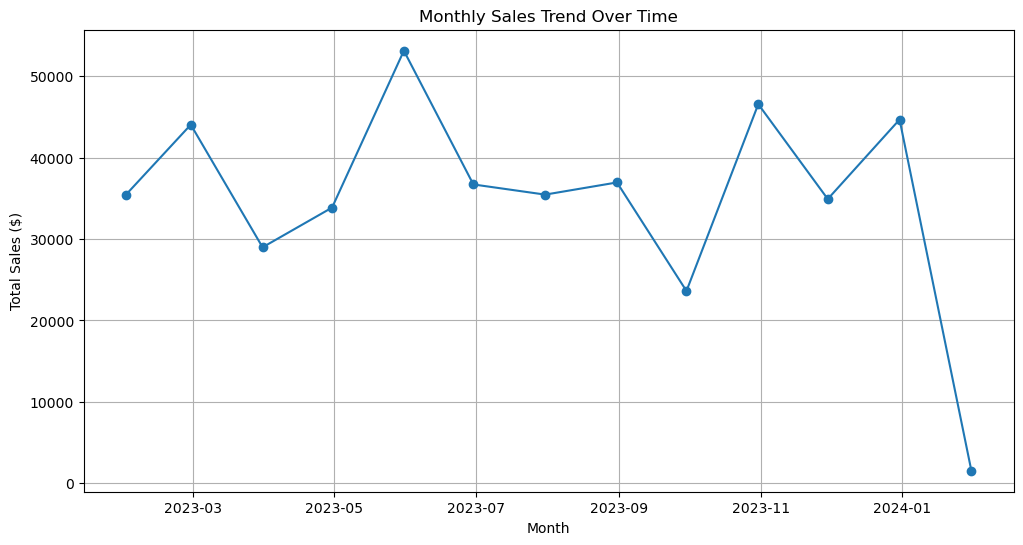

In [13]:
# Aggregate  monthly sales over time
df_time_series = df.groupby('Date')['Total Amount'].sum()

# monthly 
monthly_sales = df.groupby(pd.Grouper(key='Date', freq='M'))['Total Amount'].sum()


# Plot time series trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')  
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.grid(True)





##### The month with the highest sales is june 2023 and lowest sales is october 2023 before january 2024. January 2024 would have been excluded, because there exist only one month with sales. the data for the rest of the year werent recorded nor present

### CUSTOMER AND PRODUCT ANALYSIS 

#### GENDER DISTRIBUTION. 

In [15]:
# Gender distribution
gender_dist = df['Gender'].value_counts()
print("\nTotal_male_and_female:")
print(gender_dist)




Total_male_and_female:
Gender
Female    510
Male      490
Name: count, dtype: int64


##### There is a total of 510 female and 490 males respectively which indicates that females are more frequent in the market than males. The previous analysis on mode values also indicates females occur most. 

##### TOTAL AMOUNT SPENT BY GENDERS

In [16]:
total_amount_by_gender = df.groupby('Gender')['Total Amount'].sum()

# Display results
print("Total Amount Spent by Gender:")
print(total_amount_by_gender)


Total Amount Spent by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


##### DONUT CHART TO SHOW THE TOTAL AMOUNT SPEND BY GENDERS. 

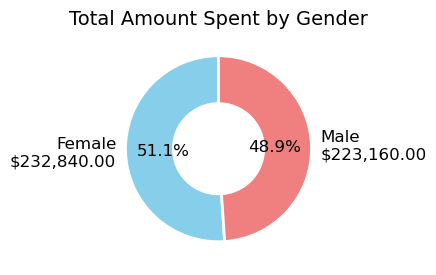

In [17]:
# Define colors
colors = ['skyblue', 'lightcoral']

# Define labels with amounts
labels = [f"{gender}\n${amount:,.2f}" for gender, amount in total_amount_by_gender.items()]

# Plot donut chart
plt.figure(figsize=(3, 7))
plt.pie(total_amount_by_gender, labels=labels, autopct='%1.1f%%', colors=colors, 
        startangle=90, wedgeprops={'edgecolor': 'white', 'linewidth': 2}, textprops={'fontsize': 12})

# Add a circle at the center to create a donut shape
centre_circle = plt.Circle((0, 0), 0.50, fc='white')
plt.gca().add_artist(centre_circle)

# Title
plt.title("Total Amount Spent by Gender", fontsize=14)

# Show plot
plt.show()


#### ANALYSIS ON THE AGE GROUP OF HOW THE CUSTOMERS WERE ACTIVE IN THE SALES. 

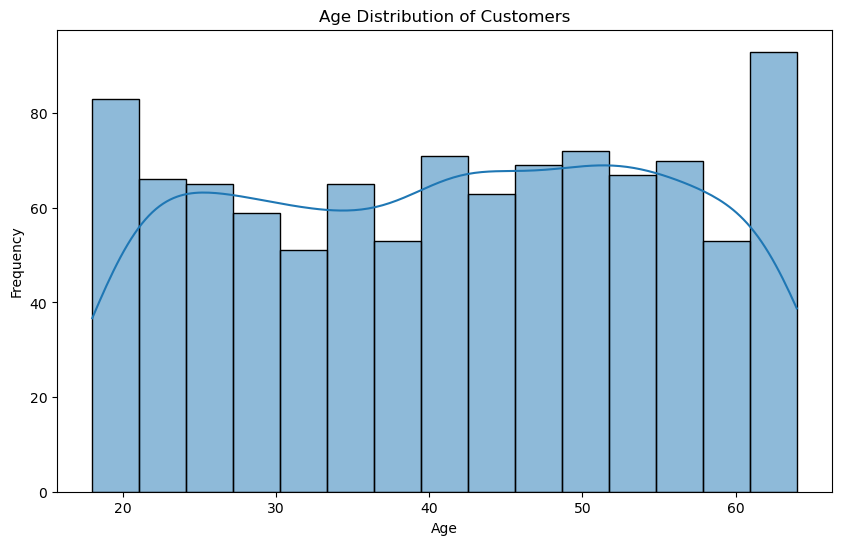

In [18]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=15, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


##### The age group 20 and 60+ shows a larger concentration of younger and older customers during the sales.  This is likely to be that the business attracts youger and older customers but fewer customers from age 25 -59. 

In [19]:
# Average age by gender
avg_age_by_gender = df.groupby('Gender')['Age'].mean()
print("\nAverage Age by Gender:")
print(avg_age_by_gender)




Average Age by Gender:
Gender
Female    41.356863
Male      41.428571
Name: Age, dtype: float64


#### Calculating how well genders patronise the product categories

<Figure size 1200x700 with 0 Axes>

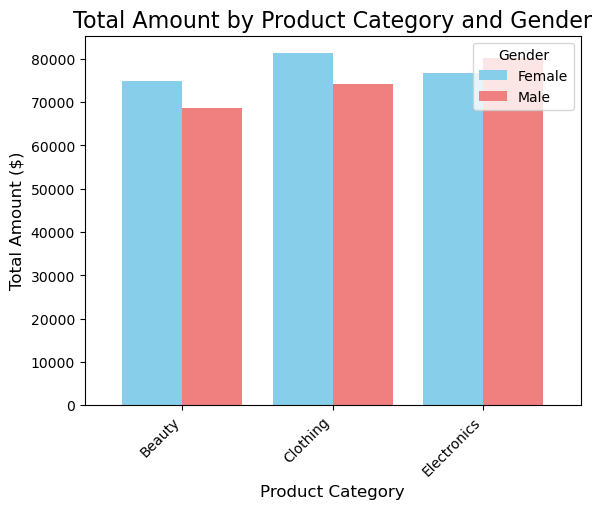

In [20]:
# Grouping data by 'Product Category' and 'Gender' and summing up 'Total Amount'
grouped_data = df.groupby(['Product Category', 'Gender'])['Total Amount'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 7))
grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'lightcoral'], width=0.8)

# Add labels and title
plt.title('Total Amount by Product Category and Gender', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.legend(title='Gender', labels=['Female', 'Male'])

# Show the plot
plt.show()

##### As previously analysed, the females were mostly active in  the market and it undoubtedly shows that they dominated the clothing and  beauty product category with less margin for  the electronics category which is mainly dominated by the males. 

In [21]:
# Product Category distribution
product_category_dist = df['Product Category'].value_counts()
print("\nProduct Category Distribution:")
print(product_category_dist)




Product Category Distribution:
Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


#### This is how both genders have transacted in the three product categories across the year with clothing having the highest number of persons. 

In [28]:
# Total spending by product category
total_spending_by_category = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)
print("\nTotal Spending on Product Category:")
print(total_spending_by_category)




Total Spending on Product Category:
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


#### Electronics is the product category with more amount of money which might be as a result of expensive products its got

In [23]:
# Average purchase amount by gender
avg_purchase_by_gender = df.groupby('Gender')['Total Amount'].mean()
print("\nAverage Purchase Amount by Gender:")
print(avg_purchase_by_gender)




Average Purchase Amount by Gender:
Gender
Female    456.549020
Male      455.428571
Name: Total Amount, dtype: float64


In [24]:
# Total quantity sold by product category
total_quantity_by_category = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False)
print("\nTotal Quantity Sold by Product Category:")
print(total_quantity_by_category)




Total Quantity Sold by Product Category:
Product Category
Clothing       894
Electronics    849
Beauty         771
Name: Quantity, dtype: int64


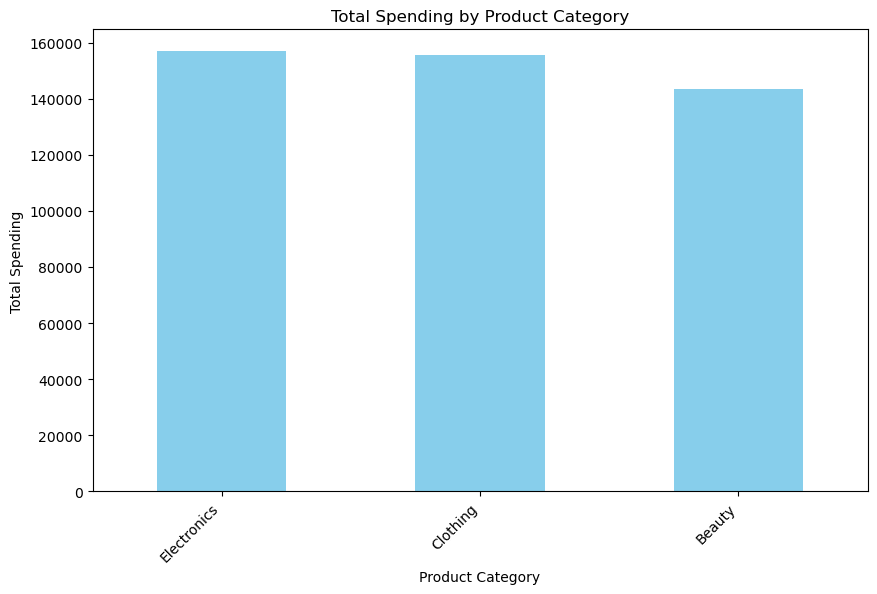

In [25]:
# Total Spending by Category
plt.figure(figsize=(10, 6))
total_spending_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Spending by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.xticks(rotation=45, ha='right')
plt.show()



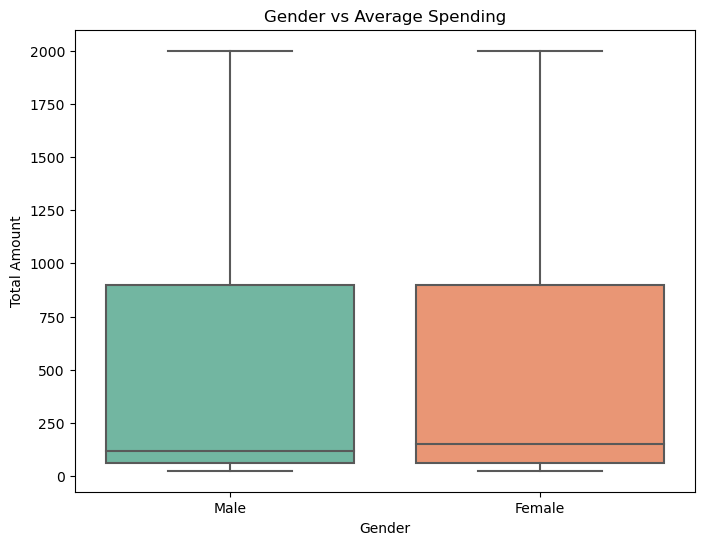

In [26]:
# Gender vs Average Spending (Boxplot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='Total Amount', data=df, palette='Set2')
plt.title('Gender vs Average Spending')
plt.show()



RECOMMENDATIONS

Sales Trends and Performance

Insight: Sales show seasonal spikes. it is advusable to offer promotions during slow periods.

Clothing and Electronics dominate, while Beauty lags.In this case, Focus on high-performing categories and bundle low-performers with popular items.

Insight: Age group 20+–60+ purchases the most. Tailor campaigns and personalized offers for these segments.

Some customers have high lifetime spending. Launch a loyalty program and explore cross-sell opportunities.